

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Dataset shows the record of 100k medical appointments scheduled in Brazil in order to detect if patients were able to make the appointments based on the following features such as 

       PatientId: Unique ID or registration number assigned to patient for identification.
       AppointmentID : Unique ID assigned for medical appointment.
       Gender: This could be male or female
       ScheduledDay: This is the actual date for the medical appointment.
       Neighborhood: This shows the hospital location.
       Age: It signifies the age of the patient.
       Scholarship:  It shows if the patient is entitled to access the Brasilian welfare program Bolsa Família.
       Hipertension: This signifies if a patient has a disease or not.	
       Diabetes:	This signifies if patient has the diagnosis or not.
       Alcoholism:	It signifies if patient has 
       Handcap:	     it signifies if patients is handcap or not
       SMS_received: It shows if text message for medical appointment was received or not.
       No-show:      It shows if patient missed or showed up for medical appointment.

    
      

### Question(s) for Analysis

>    These are the list of questions generated from observing the dataset.
>
      Can patients' age decide if appointments will be made?
      Can the scheduled day have an impact on patients' inability to show up for appointments?
      Can patients' gender determine if they attend the medical appointment?
      Can hospitals' location have an impact on patients showing up for appointments?
      
      
      
       



In [19]:
# All packages required for analysis are imported which are Pandas to read CSV file, numpy for arrays and matplotlib.pyplt to plot charts.
# "% matplotlib inline" to display chart on cell for python 3 and not on a new window.
# Source file for analysis is setup for upload and reading.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline 
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')



In [20]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


### DATA WRANGLING

In [21]:
# Data is being inspected to identify anomalies for cleanup.
df.head()
      


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



- It was detected that column names begins with a capital letter.This will be changed to small letter for easy referencing.
- Columns which are not needed for analytics such as "PatientId" and "AppointmentID" will be deleted.
- There are duplicate columns which are "AppointmentID" and "ScheduledDay". AppointmentDay will be deleted.
- ScheduledDay" will be converted to date data type for analytics.
- The column names "Hipertension" and No_show will be renamed to "Hypertension" and "no_show".
- The values on column "No-show" will be changed from "No" to "Yes and vice-versa based on the error in the dataset highlighted in the question.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no empty cells. However, "ScheduledDay" will be converted to date data type for analytics.

In [23]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age is -1 which is not possible. As a result the row will be deleted from the dataset.


### Data Cleaning

The list of observation below will be carried out sequentially in order to clean up the data

- It was detected that column names begins with a capital letter.This will be changed to small letter for easy referencing.
- Columns which are not needed for analytics such as "PatientId" and "AppointmentID" will be deleted.
- There are duplicate columns which are "AppointmentID" and "ScheduledDay". AppointmentDay will be deleted.
- ScheduledDay" will be converted to date data type for analytics.
- The column names "Hipertension" and No_show will be renamed to "Hypertension" and "no_show".
- The values on column "No-show" will be changed from "No" to "Yes and vice-versa based on the error in the dataset highlighted in the question.
- The minimum age is -1 which is not possible. As a result the row will be deleted from the dataset.

 

In [24]:
# The names of the columns are changed to lower case
df.columns=df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# Patient ID Column, which is not needed for analytics, is deleted.
# There are duplicate columns which are "AppointmentID" and "ScheduledDay". AppointmentDay is deleted.
df.drop(['appointmentid', 'appointmentday'], axis=1, inplace=True)
df.head()

,patientid,gender,scheduledday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
# Convert scheulddday to a date data type.
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
patientid        110527 non-null float64
gender           110527 non-null object
scheduledday     110527 non-null datetime64[ns]
age              110527 non-null int64
neighbourhood    110527 non-null object
scholarship      110527 non-null int64
hipertension     110527 non-null int64
diabetes         110527 non-null int64
alcoholism       110527 non-null int64
handcap          110527 non-null int64
sms_received     110527 non-null int64
no-show          110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 10.1+ MB


In [27]:
# The column "hipertension" and no-show" are renamed as "hypertension" and no_show" respectively.
df.rename(columns={'hipertension' : 'hypertension', 'no-show' : 'no_show'}, inplace=True)
df.head()


,patientid,gender,scheduledday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# The values of "no-show" are changed from No to 1 and Yes to 0 for analytics and to fix the error of the values misinterpretation. 

df['no_show'] = df['no_show'].replace(['No', 'Yes'], ['t_No', 'No'])
df.head()



,patientid,gender,scheduledday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,t_No
1,5.589978e+14,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,t_No
2,4.262962e+12,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,t_No
3,8.679512e+11,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,t_No
4,8.841186e+12,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,t_No


In [29]:
df['no_show'] = df['no_show'].replace(['t_No'], 'Yes')
df.head()


,patientid,gender,scheduledday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [30]:
df['no_show'] = df['no_show'].replace(['Yes', 'No'], ['1','0'])
df.head()

,patientid,gender,scheduledday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [31]:
# The data type for column "no_show" needs to be changed from string to int for analytics
df = df.astype({'no_show':'int'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
patientid        110527 non-null float64
gender           110527 non-null object
scheduledday     110527 non-null datetime64[ns]
age              110527 non-null int64
neighbourhood    110527 non-null object
scholarship      110527 non-null int64
hypertension     110527 non-null int64
diabetes         110527 non-null int64
alcoholism       110527 non-null int64
handcap          110527 non-null int64
sms_received     110527 non-null int64
no_show          110527 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 10.1+ MB


In [32]:
# The row consisting of the  minimum age of -1 is deleted
df.drop(df.loc[df['age']==-1].index, inplace=True)
df.describe()

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis (EDA)

EDA will provide analytics based on statistics and visualisation to answer the questions generated from the dataset.



In [33]:
df.describe()

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


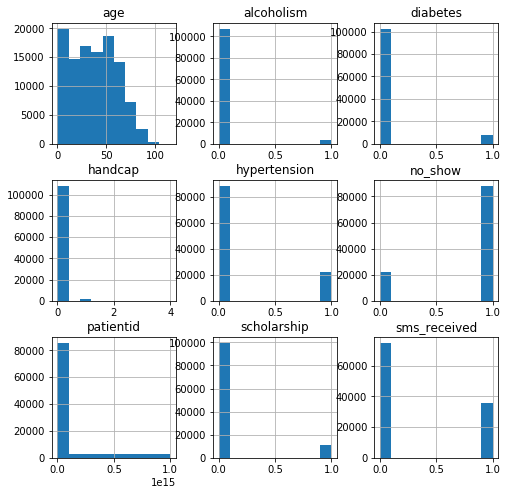

In [34]:
# It gives an insight of the distrubution of the various columns expressed in int or floats. This will provide a broad overview of the dataset
df.hist(figsize=(8,8));





### Questions

      Can patients' age decide if appointments will be made?
      Can the scheduled day have an impact on patients' inability to show up for appointments?
      Can patients' gender determine if they attend the medical appointment?
      Can hospitals' location have an impact on patients showing up for appointments?
     
      

In [35]:
dayofweek=pd.to_datetime(df['scheduledday']).dt.day_name()
df['dayofweek']=dayofweek
df.head()

,patientid,gender,scheduledday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,dayofweek
0,2.987250e+13,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday
1,5.589978e+14,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday
2,4.262962e+12,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday
3,8.679512e+11,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday
4,8.841186e+12,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday


In [36]:
df.describe()

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [37]:
attended = df.no_show == True 
missed = df.no_show == False

In [38]:
def titlelabels(xlabel,ylabel,title):
       plt.xlabel(xlabel)
       plt.ylabel(ylabel)
       plt.title(title)
       plt.legend()
       



### Research Question 1 (Can patients'age decide if appointments will be made?)

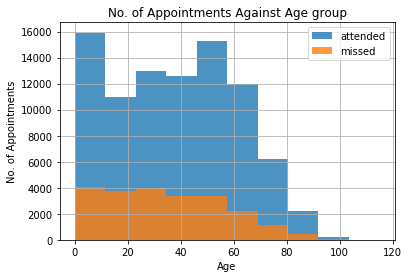

In [39]:
# Graph 1 on research question 1 (This was designed to discover the age group that will likely attend the medical appointment for effective planning)
df.age[attended].hist(alpha=0.8, bins=10, label='attended')
df.age[missed].hist(alpha=0.8, bins=10, label='missed')
titlelabels("Age", "No. of Appointments", "No. of Appointments Against Age group");


### Research Question 2 (Can the scheduled day have an impact on patients' inability to show up for appointments?)

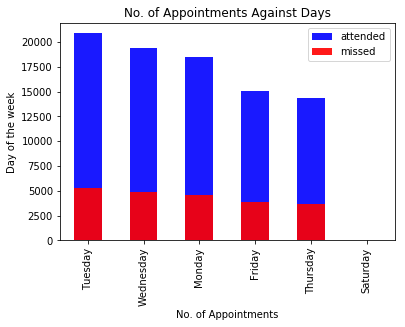

In [40]:
# Graph 2 on research question 2 (This analysis was carried to provide insights to detect the days of the week that patients are likely to attend their medical appointments.)
df.dayofweek[attended].value_counts().plot(kind='bar',alpha=0.9, color= 'blue', label='attended')
df.dayofweek[missed].value_counts().plot(kind='bar',alpha=0.9, color= 'red', label='missed')
titlelabels("No. of Appointments", "Day of the week", "No. of Appointments Against Days");



### Research Question 3 (Can patients' gender determine if they attend the medical appointment?)

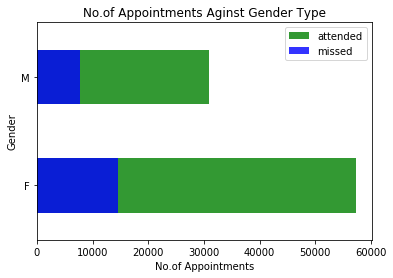

In [41]:
# Graph 3 on research question 3 (Hospital can make more enquiry to discover why men have less attendance. This will enable effective scheduling of medical appointments)
df.gender[attended].value_counts().plot(kind='barh',alpha=0.8, color= 'green', label='attended')
df.gender[missed].value_counts().plot(kind='barh',alpha=0.8, color= 'blue', label='missed')
titlelabels("No.of Appointments", "Gender", "No.of Appointments Aginst Gender Type");



### Research Question 4  (Can hospitals' location have an impact on patients showing up for appointments?)

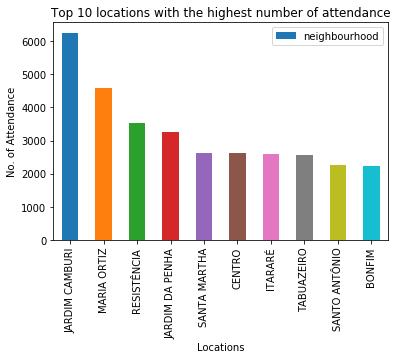

In [42]:
# Graph 4 on research question 4 (This will enable the hospital plan medical appointments based on patients locations to  increase the attendance )
top10_colors=df.neighbourhood[attended].value_counts()
top10_colors[:10].plot(kind='bar')
titlelabels("Locations", "No. of Attendance", "Top 10 locations with the highest number of attendance");



<a id='conclusions'></a>
## Conclusions based on questions
>The response to research question 1 based on  Graph 1 shows that people between age 0 t0 10, whom are children, often show up for their medical appointments. This might be as a result of parents ensuring that their children do not miss their medical appointments. Further research needs to be carried out. 

> Based on graph 2,the response to research question 2 shows that Tuesdays are a good day to fix medical appointment because a  high number of patients often show up for their medical appointments. Conclusion can be made to detect why Tuesday is a good day because further research needs to be carried out.

> The response to research question 3 based on  Graph 3 shows that femles often attend their medical appointments than males.This requires the implementation further Research needs to discover why women often show up for their medical appointments, which could be as a result of antenatal and postnatal care due to preganancy.

> Based on graph 4,the response to research question 4 communicates that patients from Jardim Camburi have the highest number of attendance, which might be as a result of promixity. It also show the top 10 locations with the highest number of attendance, which might be as a result of proximity.

### Limitation

>Dataset lacks enough information to make precise conclusion in terms of neighbourhood distance to hospital, antenatal and postnatal care information, and other parameters showing the reasons why attendance is high in a particular categories than the others.





### The flow of analysis
> - Questions were generated for insights and meaningful decisions.
> - Data wrangling was implemented for data gathering, inspection and cleanup.
> - Data exploration was carried out to generate stastical graph to have a visual look of datasets for summary and detect data anomalies.
> - Concluisons were made to response to all research questions.



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0